In [1]:
# --- necessary libraries ---
import time
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt

In [2]:
# --- set-up for pandas ---
def start():
    options = {
        'display': {
            'max_columns': None,
            'max_colwidth': 25,
            # --- Запрет на разворачивание на несколько страниц ---
            'expand_frame_repr': False,  
            'max_rows': 14,
            # --- Максимальная длина в символах на вывод последовательности текста ---
            'max_seq_items': 500,       
            'precision': 4,
            'show_dimensions': False
        },
        'mode': {
            # --- Controls SettingWithCopyWarning ---
            'chained_assignment': None   
        }
    }

    for category, option in options.items():
        for op, value in option.items():
            pd.set_option(f'{category}.{op}', value)  # Python 3.6+

start()

## 001. Dataset analysis (cleansing, preparing)/Анализ набора данных [Lenta Ru]

In [3]:
# --- read data ---
df_news_data = pd.read_csv('lenta-ru-news.csv')

In [4]:
df_news_data.head(5)

,url,title,text,topic,tags,date
0,https://lenta.ru/news...,1914. Русские войска ...,Бои у Сопоцкина и Дру...,Библиотека,Первая мировая,1914/09/16
1,https://lenta.ru/news...,1914. Празднование ст...,Министерство народног...,Библиотека,Первая мировая,1914/09/16
2,https://lenta.ru/news...,1914. Das ist Nesteroff!,Штабс-капитан П. Н. Н...,Библиотека,Первая мировая,1914/09/17
3,https://lenta.ru/news...,1914. Бульдог-гонец п...,Фотограф-корреспонден...,Библиотека,Первая мировая,1914/09/17
4,https://lenta.ru/news...,1914. Под Люблином по...,"Лица, приехавшие в Ва...",Библиотека,Первая мировая,1914/09/18


In [5]:
# --- characters count in every article ---
df_news_data['News_length'] = df_news_data['text'].str.len()

In [6]:
df_news_data.head(5)

,url,title,text,topic,tags,date,News_length
0,https://lenta.ru/news...,1914. Русские войска ...,Бои у Сопоцкина и Дру...,Библиотека,Первая мировая,1914/09/16,901.0
1,https://lenta.ru/news...,1914. Празднование ст...,Министерство народног...,Библиотека,Первая мировая,1914/09/16,346.0
2,https://lenta.ru/news...,1914. Das ist Nesteroff!,Штабс-капитан П. Н. Н...,Библиотека,Первая мировая,1914/09/17,1923.0
3,https://lenta.ru/news...,1914. Бульдог-гонец п...,Фотограф-корреспонден...,Библиотека,Первая мировая,1914/09/17,703.0
4,https://lenta.ru/news...,1914. Под Люблином по...,"Лица, приехавшие в Ва...",Библиотека,Первая мировая,1914/09/18,754.0


- Output all NaN values without any text data
- Вывод всех пустых значений (тех, где нет текста статей в наборе данных)

In [7]:
print(df_news_data[df_news_data['News_length'].isnull()])

                             url                     title text     topic    tags        date  News_length
150785  https://lenta.ru/news...  Прокуратура не нашла ...  NaN    Россия     Все  2006/04/20          NaN
153075  https://lenta.ru/news...  При штурме дома в Киз...  NaN    Россия     Все  2006/05/16          NaN
153931  https://lenta.ru/news...  В Стамбуле горит бага...  NaN       Мир     Все  2006/05/24          NaN
154591  https://lenta.ru/news...  РФ вышла из российско...  NaN    Россия     Все  2006/05/31          NaN
582527  https://lenta.ru/news...  Гребенщиков заработал...  NaN  Культура  Музыка  2016/02/23          NaN


- Drop all NaN values from dataset

- Удаление записей с нулевыми значениями

In [8]:
df_news_data = df_news_data.dropna(subset=['text'])

In [9]:
df_news_data = df_news_data.dropna(subset=['topic'])

In [10]:
df_news_data = df_news_data.dropna(subset=['News_length'])

In [11]:
df_news_data['News_length'] = df_news_data['News_length'].astype(int)

- The distribution of publications length

Text(0, 0.5, 'Частота')

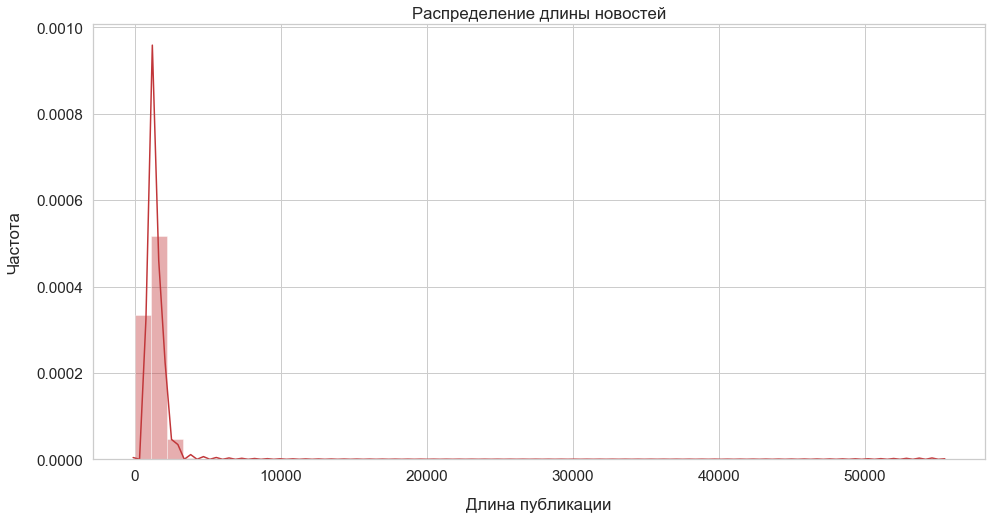

In [12]:
sns.set(font_scale=1.4, palette="RdBu", style='whitegrid')
plt.figure(figsize=(16,8))
sns.distplot(df_news_data['News_length']).set_title('Распределение длины новостей')
plt.xlabel("Длина публикации", labelpad=14)
plt.ylabel("Частота", labelpad=14)

In [13]:
# --- brief details ---
df_news_data['News_length'].describe()

count    738968.0000
mean       1335.1053
std         554.5464
min           3.0000
25%         976.0000
50%        1257.0000
75%        1606.0000
max       55387.0000
Name: News_length, dtype: float64

In [14]:
# --- observation of 98% percentile ---
quantile_98 = df_news_data['News_length'].quantile(0.98)
df_98 = df_news_data[df_news_data['News_length'] < quantile_98]

- Normalization and outliers search
- Нормализация и поиск выбросов

Text(0, 0.5, 'Частота')

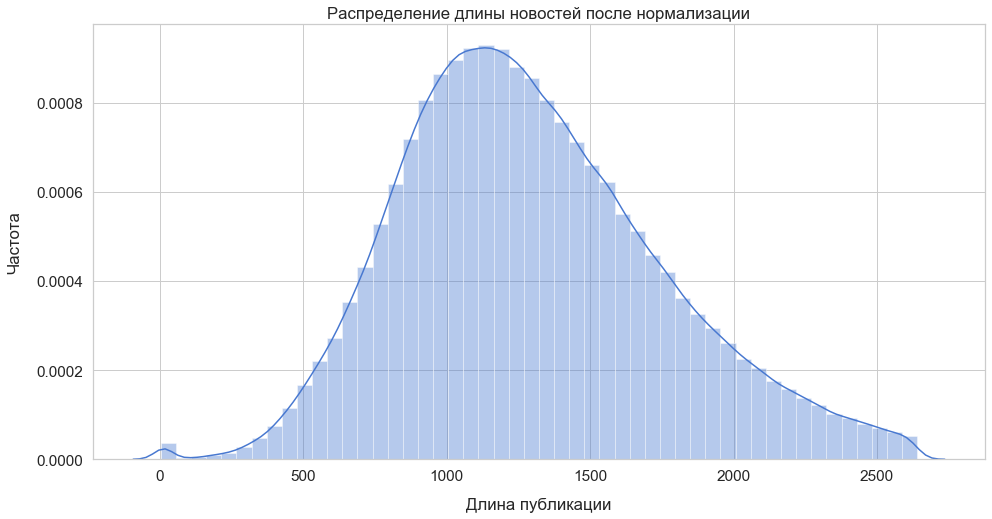

In [16]:
sns.set(font_scale=1.4, palette="muted", style='whitegrid')
plt.figure(figsize=(16,8))
sns.distplot(df_98['News_length']).set_title('Распределение длины новостей после нормализации')
plt.xlabel("Длина публикации", labelpad=14)
plt.ylabel("Частота", labelpad=14)

In [15]:
# --- print articles count depending on how many charactes inside --- 
print(len(df_news_data[df_news_data['News_length'] > 3000])
      ,'\n', len(df_news_data[df_news_data['News_length'] > 5000])
      ,'\n', len(df_news_data[df_news_data['News_length'] > 10000])
      ,'\n', len(df_news_data[df_news_data['News_length'] > 20000])
     )

6996 
 775 
 67 
 3


In [16]:
# --- an example of article text (in Russian language) ---
df_news_data[df_news_data['News_length'] > 10000]['text'].iloc[2]

'Добрый день, уважаемые коллеги. Сегодняшнюю встречу можно назвать традиционной. Сегодня мы собрались по поводу подведения итогов. В этом году мы решили собраться именно в кремлевских стенах, потому что проводить прямой эфир, в котором участвует большое количество людей, неудобно - холодно. Поэтому мы перенесем это общение на более благоприятное с точки зрения климатических условий летнее время. Начну с итогов года. Некоторые цифры вам уже известны. Первая цифра вам известна хорошо, но ее еще нужно будет уточнить. Среднегодовой темп роста ВВП - 6,8 процента. Это, примерно, соответствует среднегодовым темпам роста российской экономики за последние пять лет. На душу населения это составит около четырех тысяч долларов США, это примерно в два раза выше, чем в 2002 году. Инвестиции в основной капитал увеличились на 10 процентов, импорт товаров - на 25 процентов, благодаря превалированию объемов экспорта, над импортом мы получили в этом году рекордное сальдо - 80 миллиардов долларов. Важно о

Text(0, 0.5, 'Новостной раздел')

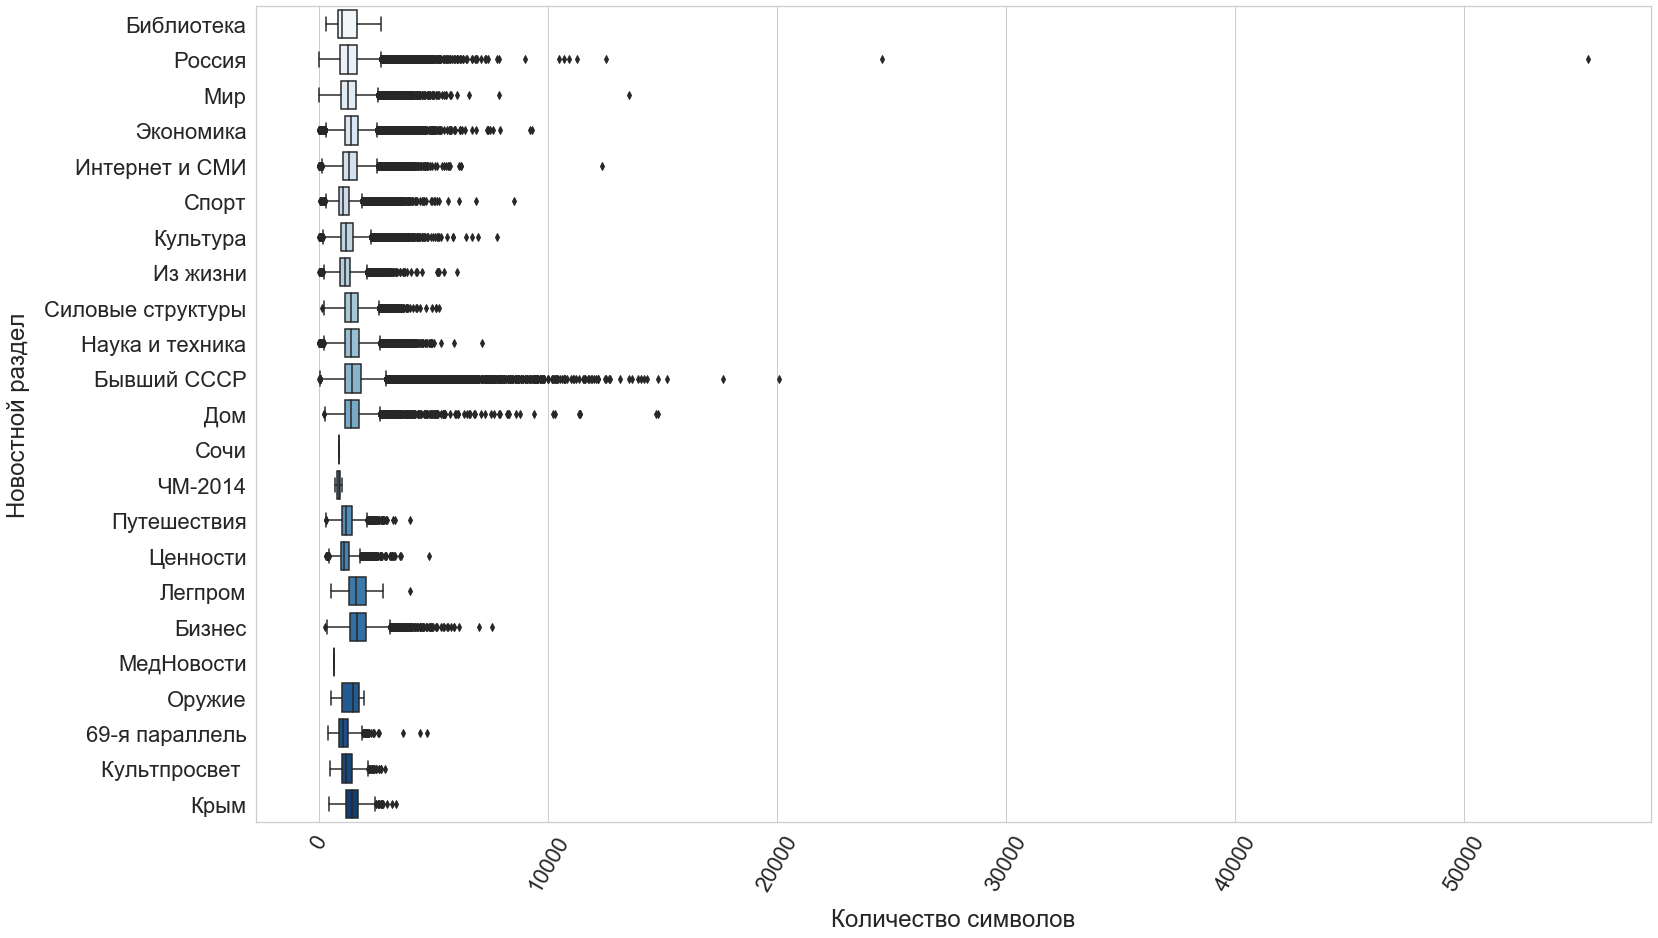

In [17]:
# --- boxplot of articles length distribution ---
plt.figure(figsize=(25,15))
sns.set(font_scale=2, palette="Blues", style='whitegrid')
sns.boxplot(data=df_news_data, x='News_length', y='topic', palette="Blues")
plt.xlabel("Количество символов", labelpad=14)
plt.xticks(rotation=60)
plt.ylabel("Новостной раздел", labelpad=14)

Text(0, 0.5, 'Новостной раздел')

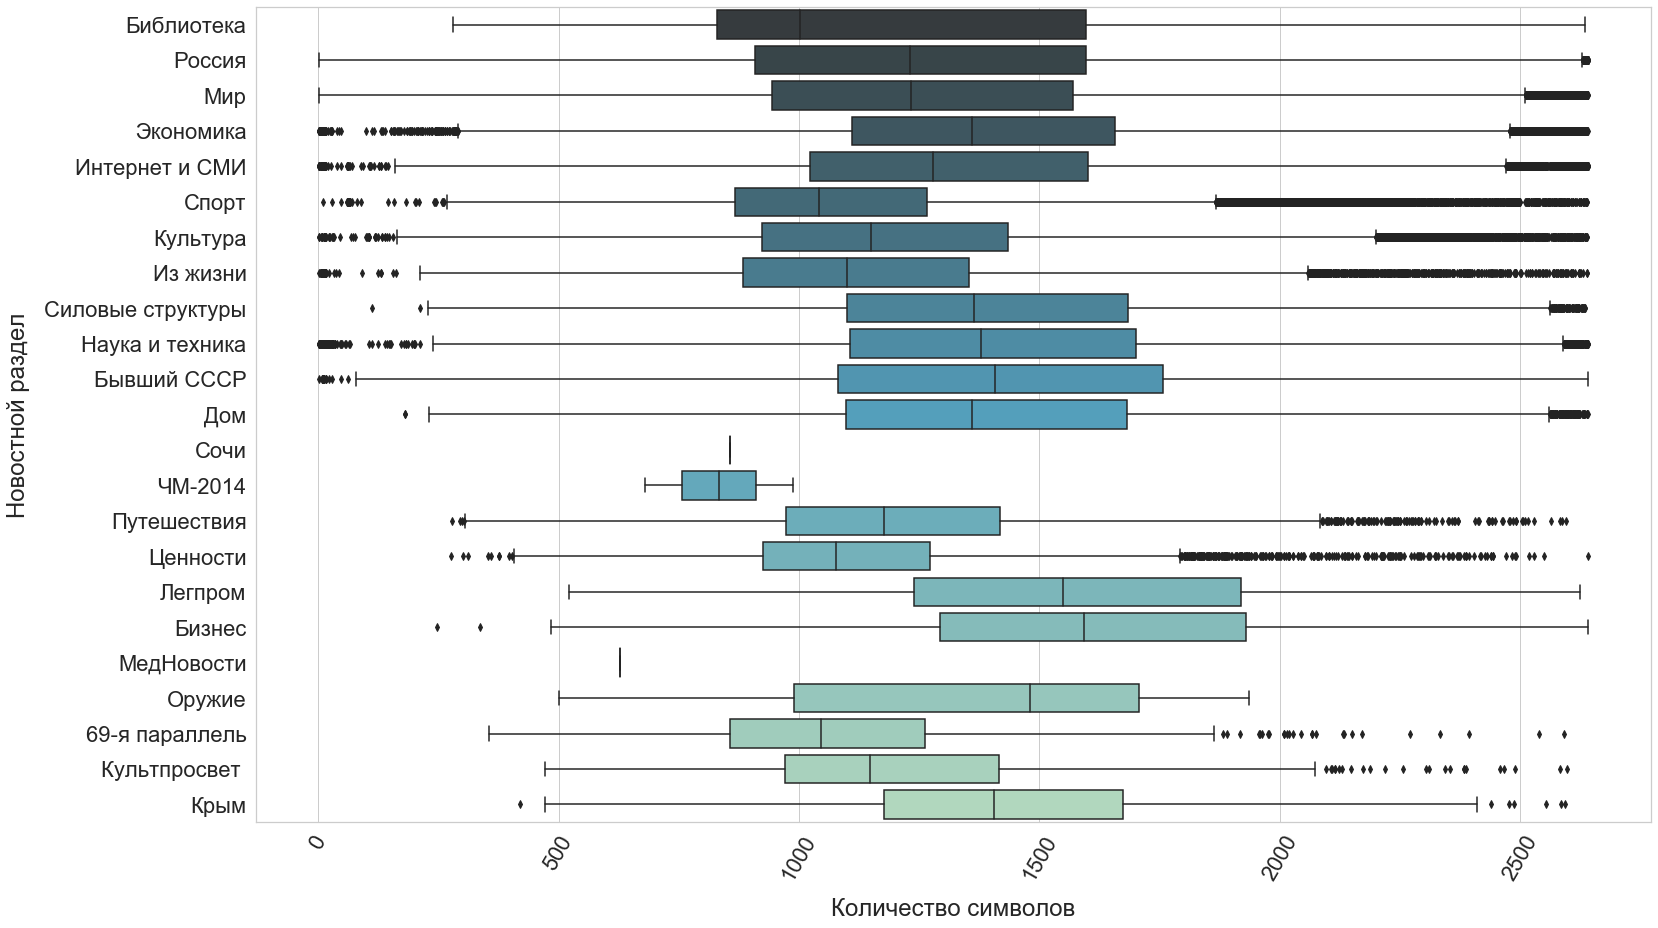

In [18]:
# --- boxplot of articles length distribution in 98% percentile ---
plt.figure(figsize=(25,15))
sns.set(font_scale=2, style='whitegrid')
sns.boxplot(data=df_98, x='News_length', y='topic', palette="GnBu_d")
plt.xlabel("Количество символов", labelpad=14)
plt.xticks(rotation=60)
plt.ylabel("Новостной раздел", labelpad=14)

- There is a difference in characters amount from one category to another, however, overall, it is from 800-1800.
- Разница в количестве символов в статьях в зависимости от категорий разная, но в целом располагается в интервале от 800 до 1800.

## 002. Main features definition/Определение основных признаков в данных
Right before the model training process it is obligatory to define features set from the raw text.<br> 
Перед обучением модели  необходимо определить набор признаков (features) из необработнанного текста.

The sequence is as following:<br>
- Data cleansing and Feature Engineering: removing special characters, lowercasing, stop-words removing, lemmatization
- Label encoding: an additional dictionary containing mappings of categories and codes
- Train and Test data split
- Text visualization (TF-DF/doc2vec)
<br><br>
Последовательность следующая:
- Очистка текста и подготовка: очистка служебных символов, приведение к нижнему регистру, отсечение стоп-слов, лемматизация.
- Label coding: создание словаря для мэппинга каждой новостной категории и кода категории.
- Разделение на обучающую и тестовую выборки (train-test split).
- Визуализация текста (tf-idf; dov2vec (word2vec)).

In [19]:
# --- regular expressions library ---
import re
# --- NLTK for stop-words removal and lemmatization ---
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# --- statistical library for TF-IDF vectorization ---
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2

In [20]:
df_news_data.head(3)

,url,title,text,topic,tags,date,News_length
0,https://lenta.ru/news...,1914. Русские войска ...,Бои у Сопоцкина и Дру...,Библиотека,Первая мировая,1914/09/16,901
1,https://lenta.ru/news...,1914. Празднование ст...,Министерство народног...,Библиотека,Первая мировая,1914/09/16,346
2,https://lenta.ru/news...,1914. Das ist Nesteroff!,Штабс-капитан П. Н. Н...,Библиотека,Первая мировая,1914/09/17,1923


In [21]:
# --- an example of text (in Russian language) ---
df_news_data.loc[10]['text']

'С 1 сентября на всей территории России вводится новая форма таможенной декларации для физических лиц. Как пояснили в Государственном таможенном комитете (ГТК), форма декларации, которая была одобрена Советом руководителей таможенных служб государств-участников Содружества, является единой на территории всех стран СНГ, за исключением Армении. По данным ИТАР-ТАСС, в новой декларации содержится более подробный перечень товаров, подлежащих обязательному декларированию. Так, впервые в их число включены ядовитые и сильно действующие вещества и лекарства, радиоактивные материалы, объекты флоры и фауны, а также высокочастотные радио-электронные устройства и средства связи - в частности, системы радиолокации, кабельного телевидения и средства мобильной связи частотой выше 9 килогерц. Кроме того, в декларации будет необходимо приводить более подробные сведения о ввозимом или вывозимом транспортном средстве - вид машинs, год выпуска, объем двигателя, номера двигателя, кузова и шасси. В России но

In [22]:
## ======== on behalf of optimization and time saving we are Sampling 20% of original data ============
df_news_frac = df_news_data.sample(frac=0.20)
len(df_news_frac)

147794

### 2.1 Data cleansing & preparation / Очистка и подготовка данных

In [23]:
# --- load bar lib ---
from tqdm import tqdm, tqdm_notebook
from time import sleep

In [24]:
# --- removal of spaces and quotes ---
df_news_frac['text_parsed_1'] = df_news_frac['text'].str.replace("  ", " ")
df_news_frac['text_parsed_1'] = df_news_frac['text'].str.replace('"', '')

In [26]:
df_news_frac.loc[10]['text_parsed_1'] 

'С 1 сентября на всей территории России вводится новая форма таможенной декларации для физических лиц. Как пояснили в Государственном таможенном комитете (ГТК), форма декларации, которая была одобрена Советом руководителей таможенных служб государств-участников Содружества, является единой на территории всех стран СНГ, за исключением Армении. По данным ИТАР-ТАСС, в новой декларации содержится более подробный перечень товаров, подлежащих обязательному декларированию. Так, впервые в их число включены ядовитые и сильно действующие вещества и лекарства, радиоактивные материалы, объекты флоры и фауны, а также высокочастотные радио-электронные устройства и средства связи - в частности, системы радиолокации, кабельного телевидения и средства мобильной связи частотой выше 9 килогерц. Кроме того, в декларации будет необходимо приводить более подробные сведения о ввозимом или вывозимом транспортном средстве - вид машинs, год выпуска, объем двигателя, номера двигателя, кузова и шасси. В России но

In [27]:
# --- lowercasing all characters ---
df_news_frac['text_parsed_2'] = df_news_frac['text_parsed_1'].str.lower()

In [28]:
df_news_frac.loc[10]['text_parsed_2']

'с 1 сентября на всей территории россии вводится новая форма таможенной декларации для физических лиц. как пояснили в государственном таможенном комитете (гтк), форма декларации, которая была одобрена советом руководителей таможенных служб государств-участников содружества, является единой на территории всех стран снг, за исключением армении. по данным итар-тасс, в новой декларации содержится более подробный перечень товаров, подлежащих обязательному декларированию. так, впервые в их число включены ядовитые и сильно действующие вещества и лекарства, радиоактивные материалы, объекты флоры и фауны, а также высокочастотные радио-электронные устройства и средства связи - в частности, системы радиолокации, кабельного телевидения и средства мобильной связи частотой выше 9 килогерц. кроме того, в декларации будет необходимо приводить более подробные сведения о ввозимом или вывозимом транспортном средстве - вид машинs, год выпуска, объем двигателя, номера двигателя, кузова и шасси. в россии но

In [32]:
# --- manual removal of punctuation and special characters ---
# --- numeric and financial characters are also taken into consideration and therefore, removed. ---
# --- удаление знаков пунктуации и служебных символов ---
# --- При замене этих символов затрагиваются числовые и денежные представления в тексте, однако для текущих целей это не важно ---

punctuation_signs = list("?!:;.,#№@$%&*)«»_—–—-(][+=~<>/\^1234567890abcdefghijklmnopqrstuvwxyz")
df_news_frac['text_parsed_3'] = df_news_frac['text_parsed_2']

for punct_sign in tqdm_notebook(punctuation_signs):
    df_news_frac['text_parsed_3'] = df_news_frac['text_parsed_3'].str.replace(punct_sign, '')
    sleep(0.01)    

In [33]:
df_news_frac.loc[10]['text_parsed_3']

'с  сентября на всей территории россии вводится новая форма таможенной декларации для физических лиц как пояснили в государственном таможенном комитете гтк форма декларации которая была одобрена советом руководителей таможенных служб государствучастников содружества является единой на территории всех стран снг за исключением армении по данным итартасс в новой декларации содержится более подробный перечень товаров подлежащих обязательному декларированию так впервые в их число включены ядовитые и сильно действующие вещества и лекарства радиоактивные материалы объекты флоры и фауны а также высокочастотные радиоэлектронные устройства и средства связи  в частности системы радиолокации кабельного телевидения и средства мобильной связи частотой выше  килогерц кроме того в декларации будет необходимо приводить более подробные сведения о ввозимом или вывозимом транспортном средстве  вид машин год выпуска объем двигателя номера двигателя кузова и шасси в россии новая форма декларации наряду с пр

In [34]:
# --- Russian Stop-Words removal --- 
# --- Удаление стоп-слов на русском ---

nltk.download('stopwords')
stop_words = list(stopwords.words('russian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\a.lapikov\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
stop_words[0:50]

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть']

In [36]:
df_news_frac['text_parsed_4'] = df_news_frac['text_parsed_3']
# --- useing regular expressions ---
for stop_word in tqdm_notebook(stop_words):
    regex_stopword = r"\b" + stop_word + r"\b"
    df_news_frac['text_parsed_4'] = df_news_frac['text_parsed_4'].str.replace(regex_stopword, '')
    sleep(0.01)

In [37]:
# --- quick view on the current dataset ---
df_news_frac

,url,title,text,topic,tags,date,News_length,text_parsed_1,text_parsed_2,text_parsed_3,text_parsed_4
171389,https://lenta.ru/news...,Вместо олимпийской де...,"В ожидании, что Москв...",Дом,Все,2006/11/15,1257,"В ожидании, что Москв...","в ожидании, что москв...",в ожидании что москва...,ожидании москва выи...
556805,https://lenta.ru/news...,В районе Московского ...,В районе Московского ...,Россия,Происшествия,2015/08/12,935,В районе Московского ...,в районе московского ...,в районе московского ...,районе московского н...
41861,https://lenta.ru/news...,Путин приказал Касьян...,Президент России Влад...,Россия,Все,2002/01/14,365,Президент России Влад...,президент россии влад...,президент россии влад...,президент россии влад...
159344,https://lenta.ru/news...,Правительство разрабо...,Правительство внесло ...,Дом,Все,2006/07/19,1613,Правительство внесло ...,правительство внесло ...,правительство внесло ...,правительство внесло ...
96192,https://lenta.ru/news...,Сербия обменяла долг ...,Министр финансов и эк...,Экономика,Все,2004/06/29,508,Министр финансов и эк...,министр финансов и эк...,министр финансов и эк...,министр финансов эко...
...,...,...,...,...,...,...,...,...,...,...,...
137153,https://lenta.ru/news...,В Екатеринбурге откро...,К Новому году в Екате...,Экономика,Все,2005/11/30,1360,К Новому году в Екате...,к новому году в екате...,к новому году в екате...,новому году екатери...
249726,https://lenta.ru/news...,"Председателем жюри ""Р...",Новым председателем ж...,Культура,Все,2008/10/09,1288,Новым председателем ж...,новым председателем ж...,новым председателем ж...,новым председателем ж...
376045,https://lenta.ru/news...,Возле московской школ...,В Москве у школы номе...,Россия,Все,2011/05/27,912,В Москве у школы номе...,в москве у школы номе...,в москве у школы номе...,москве школы номер ...
520941,https://lenta.ru/news...,Изобретение нобелевск...,Новозеландские ученые...,Наука и техника,Наука,2014/10/17,1634,Новозеландские ученые...,новозеландские ученые...,новозеландские ученые...,новозеландские ученые...


In [38]:
df_news_frac.index = np.arange(len(df_news_frac))

In [43]:
df_news_frac.text_parsed_4 = df_news_frac.text_parsed_4.replace('\s+', ' ', regex=True)

In [44]:
df_news_frac.loc[10]['text_parsed_4']

'актер алексей серебряков объяснил дал скандальное интервью хамстве россиян юрию дудю слова пятницу июня передает тасс словам артиста согласился беседу журналистом изза своих детей объясню дело дудь является кумиром моих детей даю интервью люблю этим заниматься чувствую уверенным отметил серебряков подчеркнул это попыткой самоманифестации такого вообще думаю последнюю очередь достаточно делаю экране поэтому вижу смысла своем личном участии хочу словами объяснять занимаюсь жизни рассказал актер февраля сети появилось резонансное интервью дудя серебряковым котором назвал силу наглость хамство составляющими национальной идеи россии отъехать километров москвы увидите элементов х годов поведал актер летний серебряков также снялся таких картинах девятая рота груз дилогии обитаемый остров пирамммида легенда коловрате витька чеснок вез леху штыря дом инвалидов кроме сыграл русского бандитаиммигранта британском сериале макмафия'

### 2.2 Lemmatization / Лемматизация. 56 hours of work (часов работы)

In [39]:
len(df_news_frac)

147794

In [ ]:
# --- install of needed for lemmatization ---
#!pip install pymorphy2

In [55]:
from nltk import sent_tokenize, word_tokenize, regexp_tokenize
from pymorphy2 import MorphAnalyzer

In [61]:
lemmatized_text_list = []

morph = pymorphy2.MorphAnalyzer()

def normal_rus(w):
    res = morph.parse(w)
    for r in res:
        return r.normal_form

In [63]:
for s in tqdm_notebook(df_news_frac['text_parsed_4'].values):
    lemmatized_list = []
    for w in s.split():
        n = normal_rus(w)
        lemmatized_list.append(n)
        sleep(0.01)
    lemmatized_text = " ".join(map(str, lemmatized_list))
    lemmatized_text_list.append(lemmatized_text)
    sleep(0.01)

In [64]:
# --- all words in normal form ---
lemmatized_text_list[0]

'ожидание москва выиграть конкурс право принимать летний олимпиада год правительство москва выделить строительство спортивный инфраструктура земельный участок лужники стать известно олимпиада москва земля решить застроить офис апартамент сообщать газета ведомоститерритория общий площадь гектар пересечение третье транспортный кольцо комсомольский проспект предназначить застройка занимать предприятие открытый акционерный общество оао нпо гелиймаш авиамоторный научнотехнический комплекс амнтк союзкак писать ведомость производственный мощность амнтк союз быть перебазировать рябиновый улица оао нпо гелиймаш намерить остаться местегелиймаш весной год провести закрытый конкурс выбор генеральный подрядчик соинвестор состязание выиграть который совместно оао ближний время представить новый концепция застройка бывший олимпийский территория общественный градостроительный совет мэр москвыоао нпо гелиймаш заниматься гелиевый машиностроение оно создать год старый отечественный производитель авиадвиг

In [65]:
df_news_frac['text_parsed_5'] = lemmatized_text_list

In [66]:
# --- remain only needed columns for the further analysis ---
list_columns = ["title", "topic", "date", "text_parsed_5"]
df_news = df_news_frac[list_columns]

df_news = df_news.rename(columns={'text_parsed_5': 'text_final'})

In [68]:
df_news.head(10)

,title,topic,date,text_final
0,Вместо олимпийской де...,Дом,2006/11/15,ожидание москва выигр...
1,В районе Московского ...,Россия,2015/08/12,район московский нефт...
2,Путин приказал Касьян...,Россия,2002/01/14,президент россия влад...
3,Правительство разрабо...,Дом,2006/07/19,правительство внести ...
4,Сербия обменяла долг ...,Экономика,2004/06/29,министр финансы эконо...
5,Российские баскетболи...,Спорт,2000/02/22,февраль подольск рамк...
6,В столкновениях на фу...,Мир,2014/05/12,меньший мера человек ...
7,Грузинского прокурора...,Бывший СССР,2012/02/13,грузия обвинение корр...
8,Землетрясение на севе...,Мир,2000/09/03,север штат калифорния...
9,Boeing вернул ВВС США...,Наука и техника,2011/10/04,американский авиастро...


In [69]:
%%time

df_news['date'] = pd.to_datetime(df_news['date'])
df_news['year'] = df_news['date'].apply(lambda x: "%d" % (x.year))

Wall time: 9.14 s


In [70]:
# --- year 1914 is a an absolute outlier ---
# --- 1914 год явно является архивным выбросом - удалить ---
df_news['year'].unique()

array(['2006', '2015', '2002', '2004', '2000', '2014', '2012', '2011',
       '2018', '2008', '2010', '2013', '2009', '2017', '2001', '2016',
       '2007', '2005', '2003', '1999', '1914'], dtype=object)

In [71]:
df_news = df_news[df_news.year != '1914']
df_news['year'].unique()

array(['2006', '2015', '2002', '2004', '2000', '2014', '2012', '2011',
       '2018', '2008', '2010', '2013', '2009', '2017', '2001', '2016',
       '2007', '2005', '2003', '1999'], dtype=object)

In [72]:
df_news.head()

,title,topic,date,text_final,year
0,Вместо олимпийской де...,Дом,2006-11-15,ожидание москва выигр...,2006
1,В районе Московского ...,Россия,2015-08-12,район московский нефт...,2015
2,Путин приказал Касьян...,Россия,2002-01-14,президент россия влад...,2002
3,Правительство разрабо...,Дом,2006-07-19,правительство внести ...,2006
4,Сербия обменяла долг ...,Экономика,2004-06-29,министр финансы эконо...,2004


In [73]:
len(df_news)

147793

In [74]:
df_news.drop(columns=['date'], inplace = True)

In [75]:
df_news.head()

,title,topic,text_final,year
0,Вместо олимпийской де...,Дом,ожидание москва выигр...,2006
1,В районе Московского ...,Россия,район московский нефт...,2015
2,Путин приказал Касьян...,Россия,президент россия влад...,2002
3,Правительство разрабо...,Дом,правительство внести ...,2006
4,Сербия обменяла долг ...,Экономика,министр финансы эконо...,2004


In [98]:
# --- remained categories after analysis ---
df_news['topic'].unique()

array(['Дом', 'Россия', 'Экономика', 'Спорт', 'Мир', 'Бывший СССР',
       'Наука и техника', 'Культура', 'Силовые структуры', 'Из жизни',
       'Путешествия', 'Интернет и СМИ', 'Бизнес', 'Ценности',
       '69-я параллель', 'Культпросвет ', 'Крым', 'Библиотека', 'Оружие',
       'Легпром'], dtype=object)

In [77]:
len(df_news['topic'].unique())

20

### 2.2 Label ecoding, mapping

In [79]:
# --- a dictionary for label mappings for TF-IDF ---
topic_ids = {
    'Россия': 0,
    'Мир': 1,
    'Экономика': 2,
    'Интернет и СМИ': 3,
    'Спорт': 4,
    'Культура': 5,
    'Из жизни': 6,
    'Силовые структуры': 7,
    'Наука и техника': 8,
    'Бывший СССР': 9,
    'Дом': 10,
    'Сочи': 11,
    'Библиотека': 12,
    'Ценности': 13,
    'Легпром': 14,
    'Бизнес': 15,
    '69-я параллель': 16,
    'Культпросвет ': 17,
    'Крым': 18,
    'ЧМ-2014': 19,
    'Путешествия': 20,
    'Оружие': 21
}

In [83]:
# --- a library for store and load data ---
import pickle

In [80]:
%%time

df_news['topic_id'] = df_news['topic']
df_news = df_news.replace({'topic_id':topic_ids})

Wall time: 174 ms


In [81]:
df_news.head(10)

,title,topic,text_final,year,topic_id
0,Вместо олимпийской де...,Дом,ожидание москва выигр...,2006,10
1,В районе Московского ...,Россия,район московский нефт...,2015,0
2,Путин приказал Касьян...,Россия,президент россия влад...,2002,0
3,Правительство разрабо...,Дом,правительство внести ...,2006,10
4,Сербия обменяла долг ...,Экономика,министр финансы эконо...,2004,2
5,Российские баскетболи...,Спорт,февраль подольск рамк...,2000,4
6,В столкновениях на фу...,Мир,меньший мера человек ...,2014,1
7,Грузинского прокурора...,Бывший СССР,грузия обвинение корр...,2012,9
8,Землетрясение на севе...,Мир,север штат калифорния...,2000,1
9,Boeing вернул ВВС США...,Наука и техника,американский авиастро...,2011,8


In [84]:
%%time
# df
with open('[02].Data_tfidf/df_final.pickle', 'wb') as output:
    pickle.dump(df_news, output)

Wall time: 3.5 s


# ============================================================
## Additional TF-IDF vectorization is presented below just for the sake of testing its performance. It is neither considered, nor used in next steps of analysis
# ============================================================

## 3. Train and test split for TF-IDF model testing

In [85]:
%%time

X_train, X_test, y_train, y_test = train_test_split(df_news['text_final'], 
                                                    df_news['topic_id'], 
                                                    test_size = 0.2, 
                                                    random_state = 5)

Wall time: 44.9 ms


There is a few possible ways to represent text for feature extraction:<br>
Существует несколько возможностей представлений текста для выделения признаков:

- Count Vectors as features
- <b>TF-IDF Vectors as features</b>
- <b>Word Embeddings as features</b>
- Text / NLP based features
- Topic Models as features
<br><br>
TF-IDF Vectors as features

Let's define parameres for TF-IDF analysis:<br>
Определим параметры для TF-IDF анализа:

- ngram_range: Unigrams & Bigrams are taken into consideration. Будем рассматривать и униграммы и биграммы.
- max_df: При составлении словаря проускаются объекты, которые имеют частоту встречаемости, значительно превышающую заданный интервал
- min_df: При составлении словаря проускаются объекты, которые имеют частоту встречаемости, значительно ниже заданного интервала
- max_features: Если не задан этот парамер, словарь строится только по топ max_features, упорядоченных по частоте встречаемости слова в корпусе.

In [86]:
# --- Selected parameters for TF-IDF. Выбранные параметры для TF-IDF ---
ngram_range = (1,2)
min_df = 10
max_df = 0.78
max_features = 10000

In [87]:
# --- L2 normalization is used. применяется L2 норма ---

tfidf = TfidfVectorizer(encoding    = 'utf-8',
                        ngram_range = ngram_range,
                        stop_words  = None,
                        lowercase   = False,
                        max_df      = max_df,
                        min_df      = min_df,
                        max_features= max_features,
                        norm        = 'l2',
                        sublinear_tf= False)

start = time.time()

# --- Train features and labels ---
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train

stop_train = time.time()
print(f"Время обучения модели: {stop_train - start} сек", '\n', 'Обучающие признаки: ', features_train.shape)

# --- Test features and labels ---
features_test = tfidf.transform(X_test).toarray()
labels_test = y_test

stop_test = time.time()
print(f"Время тестирования модели: {stop_test - start} сек", '\n', 'Тестовые признаки: ', features_test.shape)

Время обучения модели: 68.23808264732361 сек 
 Обучающие признаки:  (118234, 10000)
Время тестирования модели: 83.75641822814941 сек 
 Тестовые признаки:  (29559, 10000)


In [88]:
len(labels_test.unique())

18

In [89]:
labels_test.unique()

array([ 0,  7,  2,  4,  9,  1,  5,  8,  6,  3, 10, 20, 15, 13, 16, 17, 18,
       14], dtype=int64)

After the train we are using xi-square metric for correlation estimation of uni- and bigrams per category<br>
После обучения модели используем метрику "ХИ-квадрат" для оценки корреляции униграмм и биграмм в каждой рубрике

In [90]:
from sklearn.feature_selection import chi2

for article, topic_id in tqdm_notebook(sorted(topic_ids.items())):
    features_chi2 = chi2(features_train, labels_train == topic_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# Тема '{}':".format(article))
    print("  . Наиболее коррелируемые униграммы:\n. {}".format('\n. '.join(unigrams[-5:])))
    print("  . Наиболее коррелируемые биграммы:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")
    sleep(0.01)

# Тема '69-я параллель':
  . Наиболее коррелируемые униграммы:
. красноярский
. норникель
. арктика
. мурманский
. арктический
  . Наиболее коррелируемые биграммы:
. автономный округа
. красноярский край

# Тема 'Библиотека':
  . Наиболее коррелируемые униграммы:
. солдат
. австрийский
. пехота
. хлеб
. германский
  . Наиболее коррелируемые биграммы:
. мирный население
. принять мера

# Тема 'Бизнес':
  . Наиболее коррелируемые униграммы:
. аэрофлот
. автоваз
. башнефть
. роснефть
. трансаэро
  . Наиболее коррелируемые биграммы:
. миллиард рубль
. северный поток

# Тема 'Бывший СССР':
  . Наиболее коррелируемые униграммы:
. тимошенко
. грузия
. киев
. украинский
. украина
  . Наиболее коррелируемые биграммы:
. верховный рад
. президент украина

# Тема 'Дом':
  . Наиболее коррелируемые униграммы:
. квадрат
. квартира
. недвижимость
. жильё
. квадратный
  . Наиболее коррелируемые биграммы:
. тысяча квадратный
. квадратный метр

# Тема 'Из жизни':
  . Наиболее коррелируемые униграммы:
. к

## 4. Model training on classifiers / Обучение модели на классификаторах 

### 4.1 Random Forest (Алгоритм Случайного Леса)

In [95]:
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
# --- Vector dimensionality check ---
print(features_train.shape)
print(features_test.shape)

(118234, 10000)
(29559, 10000)


Произведем тьюнинг следующих гиперпараметров:

- n_estimators = количество деревьев в лесу;
- max_features = макс. количество признаков, рассматриваемых в одном узле дерева; 
- max_depth = макс.кол-во уровней (дрилл-даун) в каждом дереве решений;
- min_samples_split = мин. кол-во точек данных в узле до разделения узла;
- min_samples_leaf = мин. кол-во точек данных, допустимых в узле листа;
- bootstrap = метод сэмплинга точек данных (с/без замены)

In [97]:
best_result_rfc = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                                         max_depth=100, max_features='sqrt', max_leaf_nodes=None,
                                         min_impurity_decrease=0.0, min_impurity_split=None,
                                         min_samples_leaf=1, min_samples_split=5,
                                         min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
                                         oob_score=False, random_state=5, verbose=0, warm_start=False)

In [62]:
%%time
best_result_rfc.fit(features_train, labels_train)

Wall time: 1h 8min 24s


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=150, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
                       oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [63]:
%%time
# --- test features prediction ---

rfc_pred = best_result_rfc.predict(features_test)

Wall time: 9.48 s


- Train set accuracy:
- Точность обучающей выборки:

In [66]:
print("Метрика точности обучающей выборки: ")
print(accuracy_score(labels_train, best_result_rfc.predict(features_train)))

Метрика точности обучающей выборки: 
0.9985452659118589


- Test set accuracy:
- Точность тестовой выборки:

In [64]:
print("Метрика точности тестовой выборки: ")
print(accuracy_score(labels_test, rfc_pred))

Метрика точности тестовой выборки: 
0.7265099914294736


In [254]:
# --- Classification report ---
print("Classification report")
print(classification_report(labels_test,rfc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.66      0.84      0.74      4873
           1       0.65      0.84      0.73      4089
           2       0.72      0.81      0.76      2383
           3       0.70      0.42      0.52      1268
           4       0.92      0.95      0.94      2001
           5       0.82      0.76      0.79      1618
           6       0.85      0.17      0.28       800
           7       0.89      0.09      0.16       613
           8       0.77      0.72      0.75      1558
           9       0.79      0.67      0.72      1646
          10       0.87      0.61      0.72       630
          12       0.00      0.00      0.00         3
          13       0.88      0.67      0.76       230
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00       210
          16       0.00      0.00      0.00        26
          17       0.00      0.00      0.00        10
     

In [189]:
base_model = RandomForestClassifier(random_state = 5)
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

0.6832062790382967

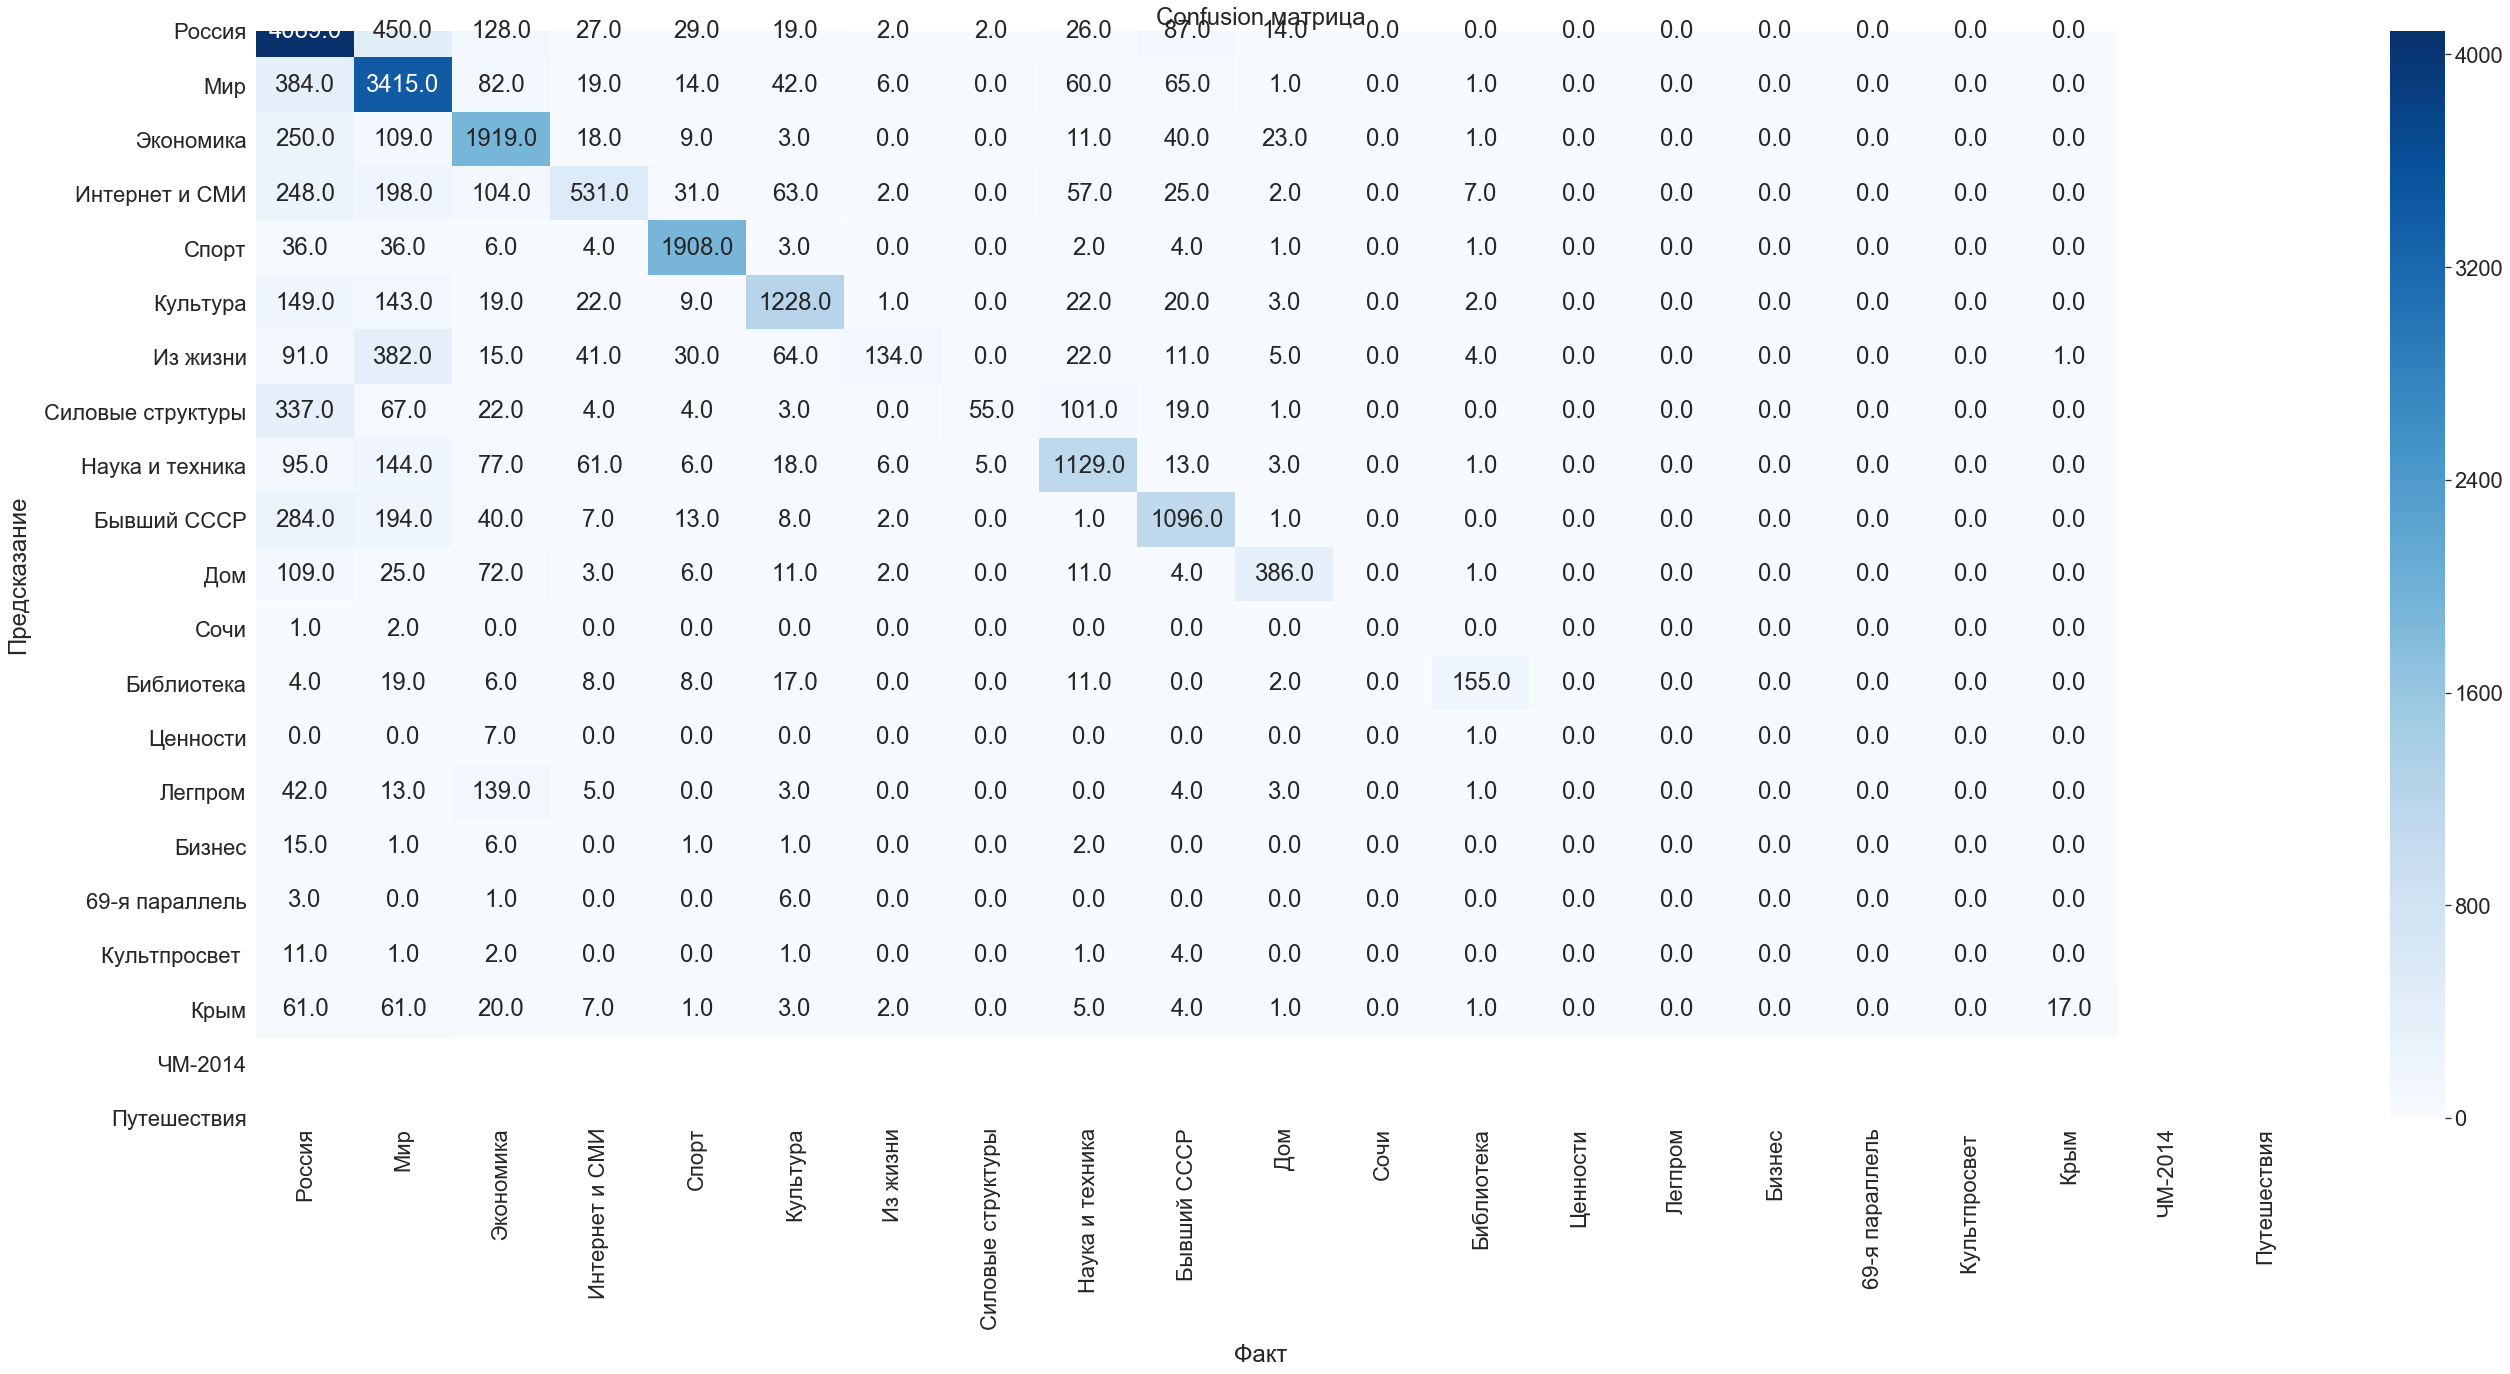

In [256]:
# --- Confusion matrix ---
sns.set(font_scale=2, style='whitegrid')
aux_df = df_news_frac[['topic', 'topic_id']].drop_duplicates().sort_values('topic_id')
conf_matrix = confusion_matrix(labels_test, rfc_pred)
plt.figure(figsize=(45,20))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['topic'].values, 
            yticklabels=aux_df['topic'].values,
            cmap="Blues",
            fmt = ".1f")
plt.ylabel('Предсказание', labelpad=14)
plt.xlabel('Факт', labelpad=14)
plt.title('Confusion матрица')
plt.show()

In [68]:
# --- save for later ---
d = {
     'Model': 'Random Forest',
     'Accuracy на обучающей выборке': accuracy_score(labels_train, best_result_rfc.predict(features_train)),
     'Accuracy на тестовой выборке': accuracy_score(labels_test, rfc_pred)
}

df_models_rfc = pd.DataFrame(d, index=[0])

In [69]:
import pickle

In [72]:
with open('[01].Models/best_rfc.pickle', 'wb') as output:
    pickle.dump(best_result_rfc, output)
    
with open('[01].Models/df_models_rfc.pickle', 'wb') as output:
    pickle.dump(df_models_rfc, output)